In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb

import sklearn
import sklearn.metrics as sm

In [5]:
from sklearn.cluster import AgglomerativeClustering

import scipy
from scipy.cluster.hierarchy import dendrogram , linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet

from scipy.spatial.distance import pdist



In [7]:
np.set_printoptions(precision = 4 , suppress = True)
plt.figure(figsize= (10 , 3))
%matplotlib inline
plt.style.use('seaborn-whitegrid')

In [8]:
address = r'C:\Users\Dell\Python For Data Science\Data\mtcars.csv'

cars = pd.read_csv(address )
 
cars.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [12]:
cars.rename(columns = {'Unnamed: 0':'car_names'}, inplace = True)

In [13]:
cars.head()

,car_names,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [22]:
X = cars[['mpg' , 'disp' , 'hp' , 'wt']].values
y = cars.iloc[:,(9)].values
y

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [23]:
Z = linkage(X , 'ward')

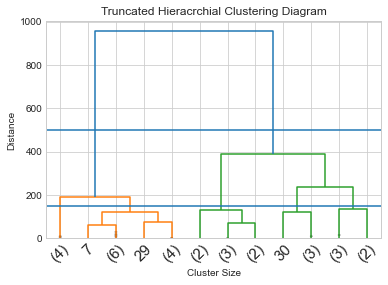

In [24]:
dendrogram(Z, truncate_mode = 'lastp' , p=12 , leaf_rotation = 45. , leaf_font_size = 15 , show_contracted = True)

plt.title('Truncated Hieracrchial Clustering Diagram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')

plt.axhline(y = 500)
plt.axhline(y=150)
plt.show()

In [25]:
k = 2

Hclustering = AgglomerativeClustering(n_clusters = k , affinity= 'euclidean' , linkage = 'ward')
Hclustering.fit(X)

sm.accuracy_score(y , Hclustering.labels_)

0.78125

In [26]:

Hclustering = AgglomerativeClustering(n_clusters = k , affinity= 'euclidean' , linkage = 'average')
Hclustering.fit(X)

sm.accuracy_score(y , Hclustering.labels_)

0.78125

In [27]:
Hclustering = AgglomerativeClustering(n_clusters = k , affinity= 'manhattan' , linkage = 'average')
Hclustering.fit(X)

sm.accuracy_score(y , Hclustering.labels_)

0.71875